In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg
from scipy.stats import ttest_ind

def plot_2histograms(x, y):
    plt.figure(figsize=(8, 6))
    plt.hist([x, y], bins=7, label= ["1", "2"])
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()
    
def ttest(controle, tratamento):
    stat, p = stats.ttest_ind(controle, tratamento)
    print('t=%.3f, p=%.5f' % (stat, p))
    if p <= 0.0001:
        return "****"
    elif p <= 0.001:
        return "***"
    elif p <= 0.01:
        return "**"
    elif p <= 0.05:
        return "*"
    return "NS"

In [2]:

def teste_normalidade(x):
    # Plotting the histogram with KDE line
    plt.subplot(1, 2, 1)
    plt.rcParams["figure.figsize"] = (8, 4)
    ax = sns.histplot(x, kde=True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('gray')
    ax.tick_params(axis='x', width=0.5, color='gray')
    ax.tick_params(axis='y', width=0.5, color='gray')

    # Plotting the QQ-plot
    plt.subplot(1, 2, 2)
    pg.qqplot(x, dist='norm')
    
    # Calculating skewness and kurtosis
    print('Sample size:', len(x))
    print('Skewness:', stats.skew(x), '(The farther from zero, the less normal)')
    print('Kurtosis:', stats.kurtosis(x))

    # Shapiro-Wilk test (may not work well with many identical values)
    W, p = stats.shapiro(x)
    print('Shapiro-Wilk: W={0}, p={1}'.format(W, p), '(if p > 0.05, it is normal)')

    # Kolmogorov-Smirnov test
    D, p = stats.kstest(x, cdf='norm', args=(x.mean(), x.std()), N=len(x))
    print('Kolmogorov-Smirnov: D={0}, p={1}'.format(D, p), '(if p > 0.05, it is normal)')

    # Anderson-Darling test
    ad_stat, ad_critical, ad_theoretical = stats.anderson(x, dist='norm')
    print('Anderson-Darling: T={0}, p(0.05)={1}'.format(ad_stat, ad_critical[2]), '(if p > 0.05, it is normal)')
    print('Anderson-Darling critical values:', ad_critical)
    print('Anderson-Darling percentages:', ad_theoretical)

In [3]:
df = pd.read_csv('data/jacob_results_teste.csv', sep='\t')
df.head()

,,Image A,Image B,ROI,Auto Threshold A,Auto Threshold B,Using Stack Histogram,Pearson's Coefficient,M1,M2,...,Thresholded M1,Thresholded M2,Random Pearson Costes 2D,Random Pearson Costes 2D pValueCorrelated,Random Pearson Costes 2D pValueAntiCorrelated,Area tot,Area A,Area B,Area Overlap,Timepoint
0,11,C3-d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647...,C2-d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647...,nucleus,Otsu,Otsu,True,-0.043,0.868,0.741,...,0.181,0.093,-5.840,7.360000e-17,1.000,216.978,26.047,55.358,5.061,1
1,12,C3-d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647...,C2-d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647...,combine,Otsu,Otsu,True,-0.163,0.803,0.715,...,0.145,0.081,-7.703,6.160000e-28,1.000,35.995,6.145,10.822,0.934,1
2,13,C3-d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647...,C2-d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647...,nucleus without clusters,Otsu,Otsu,True,0.005,0.893,0.746,...,0.213,0.144,0.642,8.180000e-01,0.182,181.222,27.273,42.709,5.999,1
3,14,C3-d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647...,C2-d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647...,nucleus,Otsu,Otsu,True,0.024,0.903,0.829,...,0.281,0.154,1.430,9.780000e-01,0.022,205.247,31.658,62.864,9.700,1
4,15,C3-d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647...,C2-d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647...,combine,Otsu,Otsu,True,-0.125,0.909,0.825,...,0.220,0.106,-7.871,4.430000e-29,1.000,43.729,7.625,16.343,1.855,1


<Axes: title={'center': "Pearson's Coefficient"}, xlabel='ROI'>

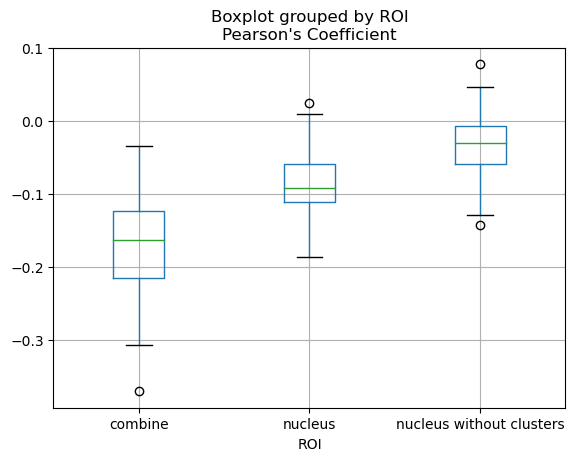

In [4]:
df.boxplot(column="Pearson's Coefficient", by='ROI')

<img src="http://localhost:8888/files/coloc%20fak%20cluster/imagens/2%20com%20contorno.jpg?_xsrf=2%7C78653a56%7C92a21b56986685715aef91b62e35b6b5%7C1689008711" alt="drawing" width="400"/>

Nucleus

<img src="http://localhost:8888/files/coloc%20fak%20cluster/imagens/3%20com%20todos%20contornos.jpg?_xsrf=2%7C78653a56%7C92a21b56986685715aef91b62e35b6b5%7C1689008711" alt="drawing" width="400"/>

Nucleus without clusters


In [5]:
df.groupby('ROI')["Pearson's Coefficient"].describe()

,count,mean,std,min,25%,50%,75%,max
ROI,,,,,,,,
combine,28.0,-0.171464,0.074836,-0.371,-0.21500,-0.1635,-0.12300,-0.034
nucleus,28.0,-0.084036,0.049189,-0.186,-0.11175,-0.0915,-0.05875,0.024
nucleus without clusters,28.0,-0.033464,0.047397,-0.143,-0.05950,-0.0300,-0.00750,0.078


In [6]:
df_clean = df[['Image A','ROI', "Pearson's Coefficient"]]

In [7]:
# anterior sem usar enlarge.
df_clean.groupby('ROI')["Pearson's Coefficient"].describe()

,count,mean,std,min,25%,50%,75%,max
ROI,,,,,,,,
combine,28.0,-0.171464,0.074836,-0.371,-0.21500,-0.1635,-0.12300,-0.034
nucleus,28.0,-0.084036,0.049189,-0.186,-0.11175,-0.0915,-0.05875,0.024
nucleus without clusters,28.0,-0.033464,0.047397,-0.143,-0.05950,-0.0300,-0.00750,0.078


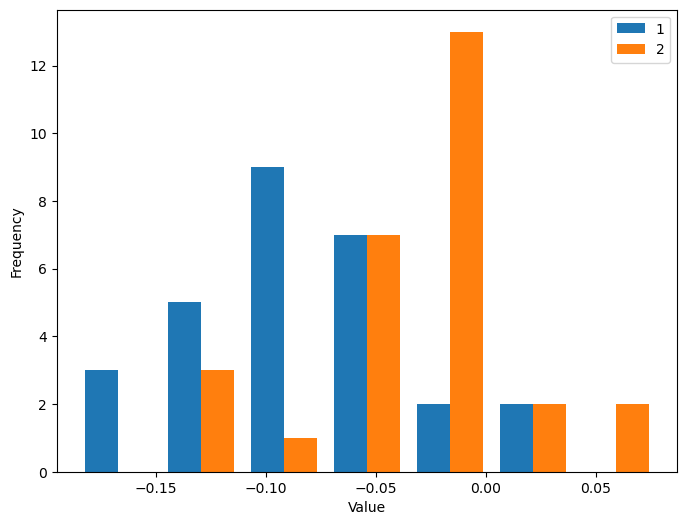

In [8]:
pc_nucleus = df_clean[df_clean['ROI']=='nucleus']["Pearson's Coefficient"]
pc_nucleos_without_clusters = df_clean[df_clean['ROI']=='nucleus without clusters']["Pearson's Coefficient"]

plot_2histograms(pc_nucleus, pc_nucleos_without_clusters)

Sample size: 28
Skewness: 0.23102093495438641 (The farther from zero, the less normal)
Kurtosis: -0.14533048073043764
Shapiro-Wilk: W=0.9845516681671143, p=0.9417741298675537 (if p > 0.05, it is normal)
Kolmogorov-Smirnov: D=0.08593899324455259, p=0.9745575707274203 (if p > 0.05, it is normal)
Anderson-Darling: T=0.2080208664828156, p(0.05)=0.708 (if p > 0.05, it is normal)
Anderson-Darling critical values: [0.518 0.59  0.708 0.826 0.983]
Anderson-Darling percentages: [15.  10.   5.   2.5  1. ]


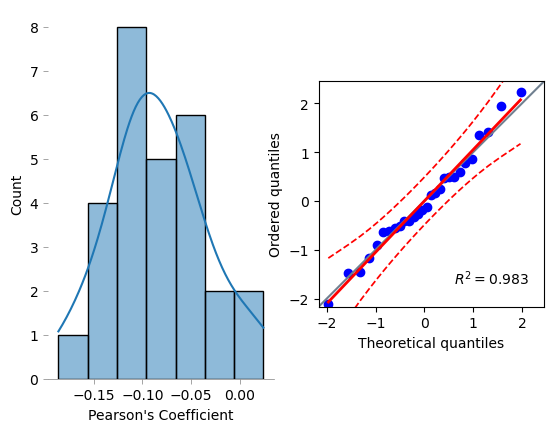

In [9]:
teste_normalidade(pc_nucleus)

Sample size: 28
Skewness: -0.27328423125161977 (The farther from zero, the less normal)
Kurtosis: 0.6857724214612535
Shapiro-Wilk: W=0.9538890719413757, p=0.2477426677942276 (if p > 0.05, it is normal)
Kolmogorov-Smirnov: D=0.13208288169172677, p=0.6647495079595807 (if p > 0.05, it is normal)
Anderson-Darling: T=0.598882269928616, p(0.05)=0.708 (if p > 0.05, it is normal)
Anderson-Darling critical values: [0.518 0.59  0.708 0.826 0.983]
Anderson-Darling percentages: [15.  10.   5.   2.5  1. ]


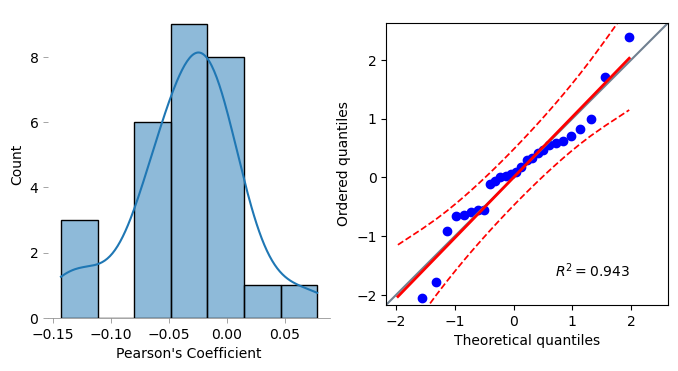

In [10]:
teste_normalidade(pc_nucleos_without_clusters)

In [11]:
ttest(pc_nucleus, pc_nucleos_without_clusters)

t=-3.918, p=0.00025


'***'

In [12]:
df_boxplot = df[(df_clean['ROI']=='nucleus') | (df_clean['ROI']=='nucleus without clusters')]

<ErrorbarContainer object of 3 artists>

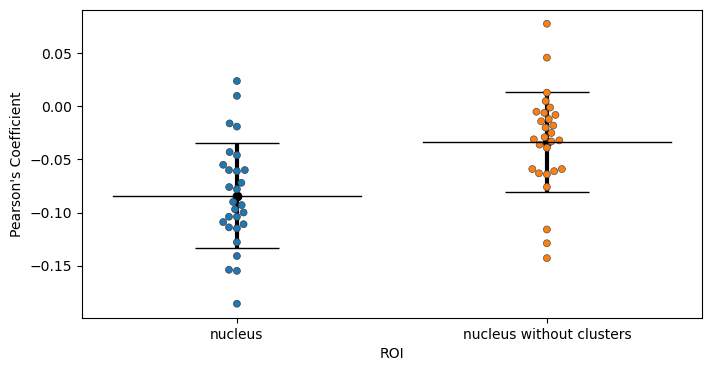

In [13]:
grupo1 = pc_nucleus
grupo2 = pc_nucleos_without_clusters

ax = sns.swarmplot(data=df_boxplot,x='ROI', y="Pearson's Coefficient", hue='ROI', order=None, hue_order=None, dodge=False, orient=None, color=None, palette=None, 
                  size=5, edgecolor='gray', linewidth=.5, hue_norm=None, native_scale=False, formatter=None, legend=False, warn_thresh=0.05, 
                  ax=None)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 1},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="ROI",
            y="Pearson's Coefficient",
            data=df_boxplot,
            showfliers=False,
            showbox=False,
            showcaps=False, 
            ax=ax)

means1 = [grupo1.mean(), grupo2.mean()]
stds1 = [grupo1.std(), grupo2.std()]
position_in_x = [0,1]
plt.errorbar(position_in_x, means1, stds1, fmt='ok', capsize= 30, linewidth = 3)

# Loading the no cluster correlation

In [14]:
df_nocluster = pd.read_csv('data/fak_nocluster pc nucleus.tsv', sep='\t')
df_nocluster.head()

,,Image A,Image B,ROI,Auto Threshold A,Auto Threshold B,Using Stack Histogram,Pearson's Coefficient,M1,M2,...,Thresholded M1,Thresholded M2,Random Pearson Costes 2D,Random Pearson Costes 2D pValueCorrelated,Random Pearson Costes 2D pValueAntiCorrelated,Area tot,Area A,Area B,Area Overlap,Timepoint
0,1,C3-d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647...,C2-d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647...,nucleus,Otsu,Otsu,True,-0.045,0.861,0.715,...,0.146,0.116,-7.447,3.077000e-26,1.000000,217.134,30.471,48.025,4.686,1
1,2,C3-d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647...,C2-d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647...,nucleus,Otsu,Otsu,True,-0.035,0.908,0.723,...,0.020,0.207,-4.653,2.357000e-11,1.000000,120.564,23.776,2.264,0.472,1
2,3,C3-d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647...,C2-d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647...,nucleus,Otsu,Otsu,True,-0.034,0.886,0.693,...,0.222,0.151,-5.629,8.523000e-16,1.000000,245.465,41.544,64.058,9.367,1
3,4,C3-d2-dox-h2ax-647-dnapk-564-fak-488-dapi-01_O...,C2-d2-dox-h2ax-647-dnapk-564-fak-488-dapi-01_O...,nucleus,Otsu,Otsu,True,-0.051,0.975,0.973,...,0.266,0.160,-11.441,3.498000e-59,1.000000,529.962,99.710,171.199,27.548,1
4,5,C3-d2-dox-h2ax-647-dnapk-564-fak-488-dapi-04_O...,C2-d2-dox-h2ax-647-dnapk-564-fak-488-dapi-04_O...,nucleus,Otsu,Otsu,True,0.021,0.985,0.953,...,0.338,0.112,3.222,1.000000e+00,0.000003,283.754,31.205,95.197,10.524,1


In [15]:
df_nocluster = df_nocluster[['Image A', 'ROI', "Pearson's Coefficient"]]

In [16]:
df_nocluster["ROI"] = 'nocluster'

In [17]:
df_nocluster

,Image A,ROI,Pearson's Coefficient
0,C3-d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647...,nocluster,-0.045
1,C3-d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647...,nocluster,-0.035
2,C3-d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647...,nocluster,-0.034
3,C3-d2-dox-h2ax-647-dnapk-564-fak-488-dapi-01_O...,nocluster,-0.051
4,C3-d2-dox-h2ax-647-dnapk-564-fak-488-dapi-04_O...,nocluster,0.021
5,C3-d2-dox-h2ax-647-dnapk-564-fak-488-dapi-04_O...,nocluster,-0.042
6,C3-d2-dox-h2ax-647-dnapk-564-fak-488-dapi-04_O...,nocluster,-0.054
7,C3-d2-dox-h2ax-647-dnapk-564-fak-488-dapi-05_O...,nocluster,0.014
8,C3-d2-dox-h2ax-647-dnapk-564-fak-488-dapi-06_O...,nocluster,-0.086
9,C3-d2-dox-h2ax-647-dnapk-564-fak-488-dapi-07_O...,nocluster,-0.060


In [18]:
df_clean = pd.concat([df_clean,df_nocluster])

In [19]:
df_clean

,Image A,ROI,Pearson's Coefficient
0,C3-d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647...,nucleus,-0.043
1,C3-d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647...,combine,-0.163
2,C3-d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647...,nucleus without clusters,0.005
3,C3-d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647...,nucleus,0.024
4,C3-d1-doxo-dapi-405-fak-488-dnapk-546-h2ax-647...,combine,-0.125
...,...,...,...
18,C3-d2-dox-h2ax-647-dnapk-564-fak-488-dapi-14_O...,nocluster,-0.076
19,C3-d2-dox-h2ax-647-dnapk-564-fak-488-dapi-15_O...,nocluster,-0.002
20,C3-d2-dox-h2ax-647-dnapk-564-fak-488-dapi-15_O...,nocluster,-0.051
21,C3-d2-dox-h2ax-647-dnapk-564-fak-488-dapi-15_O...,nocluster,0.010


In [20]:
df_boxplot = df_clean[(df_clean['ROI']=='nucleus') | (df_clean['ROI']=='nucleus without clusters') | (df_clean['ROI']=='nocluster')]

<ErrorbarContainer object of 3 artists>

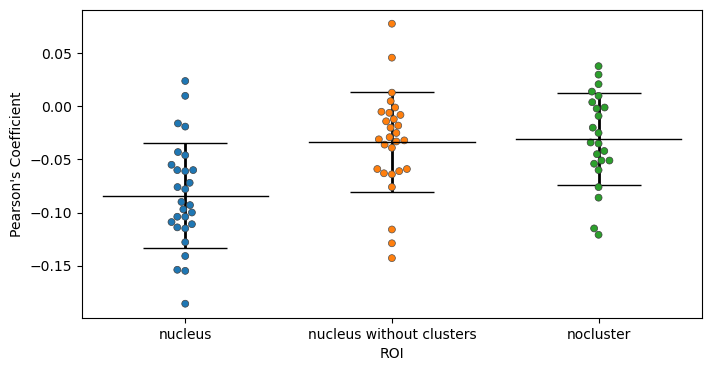

In [21]:
grupo1 = pc_nucleus
grupo2 = pc_nucleos_without_clusters
grupo3 = df_nocluster["Pearson's Coefficient"]

ax = sns.swarmplot(data=df_boxplot,x='ROI', y="Pearson's Coefficient", hue='ROI', order=None, hue_order=None, dodge=False, orient=None, color=None, palette=None, 
                  size=5, edgecolor='gray', linewidth=.5, hue_norm=None, native_scale=False, formatter=None, legend=False, warn_thresh=0.05, 
                  ax=None)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 1},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="ROI",
            y="Pearson's Coefficient",
            data=df_boxplot,
            showfliers=False,
            showbox=False,
            showcaps=False, 
            ax=ax)

means1 = [grupo1.mean(), grupo2.mean(), grupo3.mean()]
stds1 = [grupo1.std(), grupo2.std(), grupo3.std()]
position_in_x = [0,1,2]
plt.errorbar(position_in_x, means1, stds1, fmt=' ', capsize= 30, linewidth = 2, color='k')

t=-3.918, p=0.00025
***
t=-0.202, p=0.84058
NS
t=-4.052, p=0.00018
***


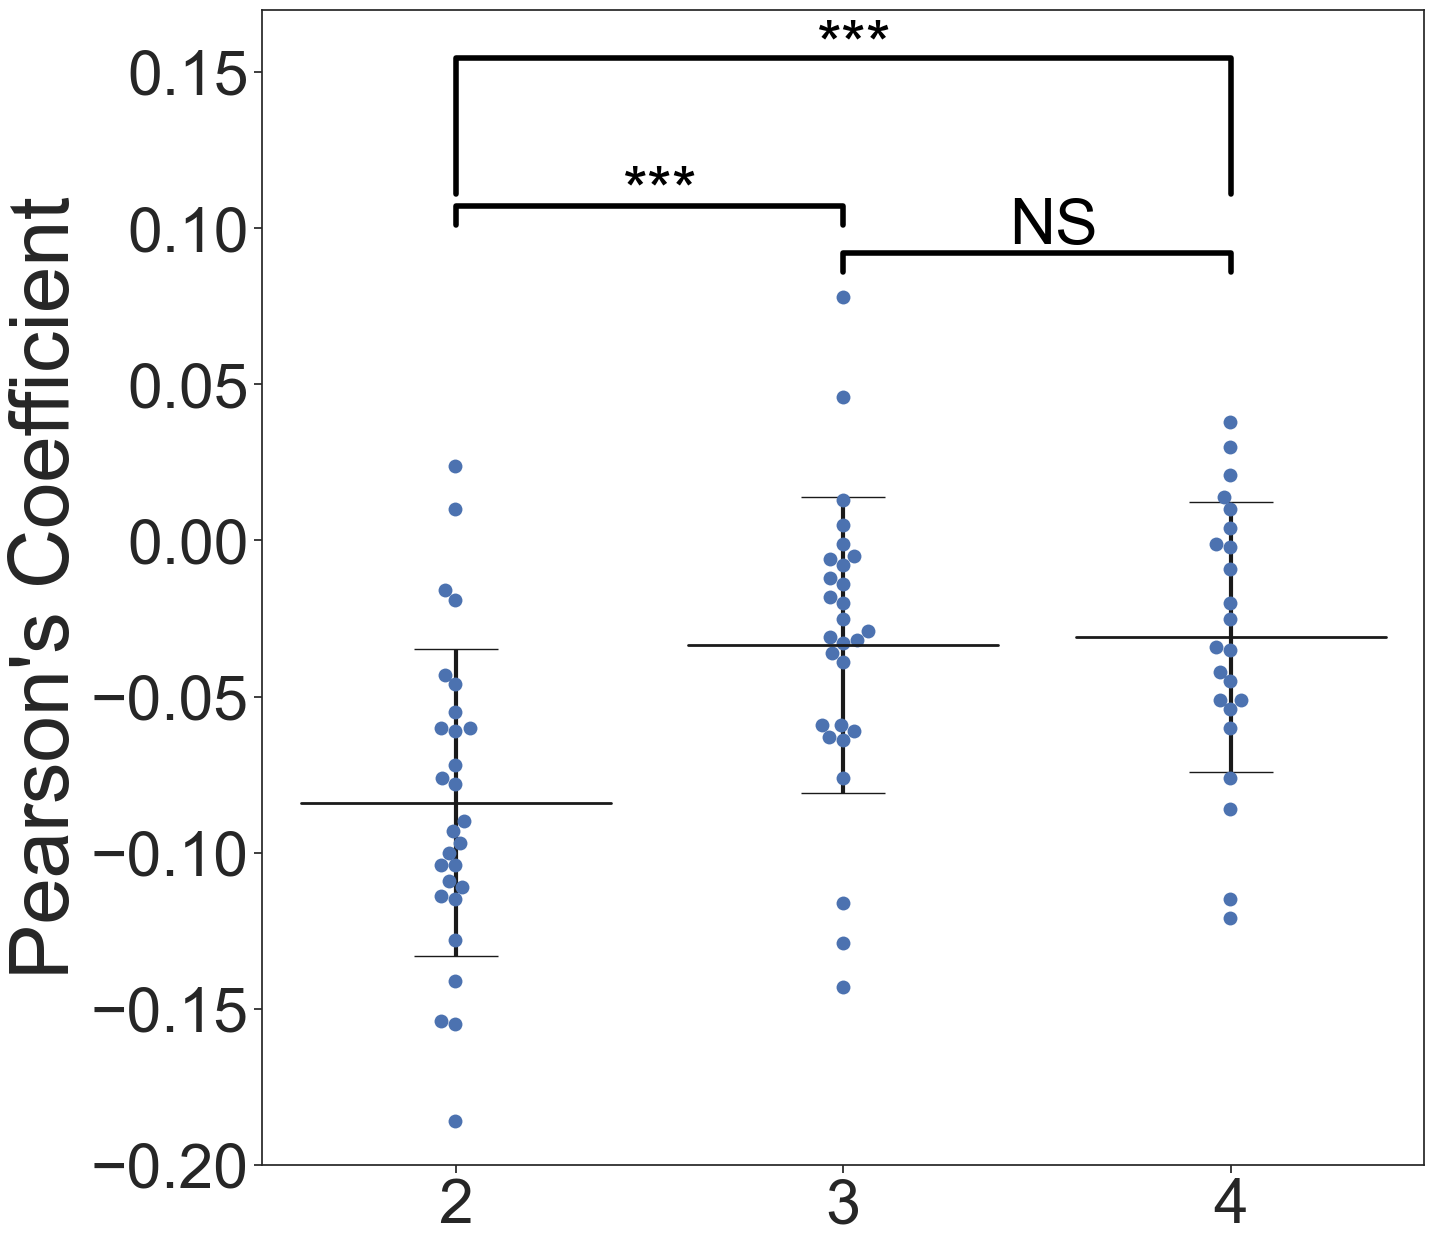

In [38]:
dataimage = df_boxplot
#----------------------------------
grupo1 = pc_nucleus
grupo2 = pc_nucleos_without_clusters
grupo3 = df_nocluster["Pearson's Coefficient"]

#-----------------------
nome_figura = 'swarmplot_pc_dnapkfak_enlarge03_higher03_v4 '
label_eixo_y = "Pearson's Coefficient"
label_eixo_x = ''
tamanho_label = 60
other_label = 40
#ttest groups


# sns.set_context("paper")


def ttesting(a,b):
    stat, p = ttest_ind(a, b)
    print('t=%.3f, p=%.5f' % (stat, p))

    def convert_pvalue_to_asterisks(pvalue):
        if pvalue <= 0.0001:
            return "****"
        elif pvalue <= 0.001:
            return "***"
        elif pvalue <= 0.01:
            return "**"
        elif pvalue <= 0.05:
            return "*"
        return "NS"

    pValue = convert_pvalue_to_asterisks(p)
    print(convert_pvalue_to_asterisks(p))
    return pValue 

# plotar traço #########################################
# essa parte serve para criar aquela barra encima do das duas barras
# agradecimentos para Sofia que me mostrou isso pela primeira vez e onde achou
# agradecimento ao Bruno que é o melhor programador que conheço e me ajudou.


def traco(text,X,Y,hight,texthight):
    x = (X[0]+X[1])/2
    y = max(Y[0], Y[1])+hight #caso o traço esteja no lugar errado, é aqui onde arruma, no valor antes da multiplicação
    dx = abs(X[0]-X[1])
    yp = y 
    xp = x-.07 # caso você achar que o asterísco não esta no lugar certo, altere o valor que é subtraido do x até que ele apareça onde é desejado
       
    props = {'connectionstyle':'bar','arrowstyle':'-',\
            'shrinkA':70,'shrinkB':70,'linewidth':4,'color':"black"}
    ax.annotate(text,fontsize =46, xy=(xp,yp+texthight), zorder=10,color="#000000")
    ax.annotate('', xy=(X[0],y), xytext=(X[1],y), arrowprops=props)

# gráfico #########################################   

x = [0,1,2]


sns.set(rc={"figure.figsize":(15, 15)}) # width=20, height=20
sns.despine()
sns.set_style("ticks")
colors = ['b', 'b','b']

ax = sns.swarmplot(x="ROI", y="Pearson's Coefficient", data=dataimage, color='b' , size=10, legend=False)


# plot the mean line (na verdade plota um boxplot mas apaga tudo menos a linha da média)
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="ROI",
            y="Pearson's Coefficient",
            data=dataimage,
            showfliers=False,
            showbox=False,
            showcaps=False, 
            ax=ax)

plt.ylabel(label_eixo_y, fontsize = tamanho_label)
plt.xlabel(label_eixo_x, fontsize = tamanho_label)

#plt.title(' ', fontsize =80)
# plt.xticks([0,1,2],['Nucleusn\ with clusters', 'Nucleus with n\ clusters removed',' Clusteless n\ nucleus'])
labels = ['2', '3', '4']
ax.set_xticklabels(labels, fontsize=tamanho_label-15, rotation_mode='anchor')
ax.tick_params(axis='y', which='major', labelsize=tamanho_label-15)
# aqui você controla a escala da fonte



means1 = [grupo1.mean(), grupo2.mean(), grupo3.mean()]
stds1 = [grupo1.std(), grupo2.std(), grupo3.std()]

plt.errorbar(x, means1, stds1, fmt=' ', capsize= 30, linewidth = 3, color='k')



# chamando def para os traços
traco(ttesting(grupo1,grupo2),x[0:2],[.02,0],.05,0.035)
traco(ttesting(grupo2,grupo3),x[1:3],[.055,.04],0,0.04)
traco(ttesting(grupo1,grupo3),(x[0], x[2]),[.08,.06],0,0.072)

plt.ylim(-0.2, 0.17)
#plt.margins(y=4)

plt.savefig(nome_figura + ".pdf", bbox_inches='tight') #salvar em .pdf pra sempre ter uma resolução infinita
plt.savefig(nome_figura + ".jpeg", bbox_inches='tight')
# plt.tight_layout()
plt.show()